# Stacked Model

### Importing Packages

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.externals import joblib
from sklearn.preprocessing import label_binarize
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 2000)

### Importing `sklearn` packages

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import log_loss

# Loading the data

## Loading Files

- X = X_num
- X_train = X_num_train
- X_test = X_num_test
- y
- y_train
- y_test

In [3]:
X_num = pd.read_pickle('X_num.pickle')

In [4]:
X_num.head(2)

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3
0,1.5,3,3000.0,5,0,95,40.7145,-73.9425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1,2250.0,5,1,63,40.7216,-73.9423,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
X_num.shape

(49352, 16)

In [6]:
X_st_proba = pd.read_pickle('Pickled_Files/X_st_proba.pickle')

In [7]:
X_st_proba.head(2)

,ST_High_Proba,ST_Low_Proba,ST_Medium_Proba
0,0.142253,0.619318,0.238429
1,0.142253,0.619318,0.238429


In [8]:
X_st_proba.shape

(49352, 3)

In [9]:
X_lt_proba = pd.read_pickle('Pickled_Files/X_lt_proba.pickle')

In [10]:
X_lt_proba.head(2)

,LT_High_Proba,LT_Low_Proba,LT_Medium_Proba
0,0.142455,0.617337,0.240208
1,0.141663,0.621609,0.236728


In [11]:
X_lt_proba.shape

(49352, 3)

## Putting together X_num + `predicted_proba` from Short-Text and Long-Text Models

In [12]:
X = pd.concat([X_num, X_st_proba, X_lt_proba], axis=1)
X.head(2)

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3,ST_High_Proba,ST_Low_Proba,ST_Medium_Proba,LT_High_Proba,LT_Low_Proba,LT_Medium_Proba
0,1.5,3,3000.0,5,0,95,40.7145,-73.9425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142253,0.619318,0.238429,0.142455,0.617337,0.240208
1,1.0,1,2250.0,5,1,63,40.7216,-73.9423,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.142253,0.619318,0.238429,0.141663,0.621609,0.236728


## Loading `y`

In [13]:
y = np.load('Pickled_Files/y.npy')

In [14]:
y, y.shape

(array([2, 1, 1, ..., 2, 1, 2]), (49352,))

## Test-Train-Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, \
X_test,  \
y_train, \
y_test = train_test_split(X, y, test_size=0.20, random_state=82)

## Scaling  `X_train` Numeric Features

In [16]:
X_train.head(2)

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3,ST_High_Proba,ST_Low_Proba,ST_Medium_Proba,LT_High_Proba,LT_Low_Proba,LT_Medium_Proba
28154,1.0,0,2450.0,5,15,112,40.7606,-73.9994,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.141610,0.621039,0.237351,0.142523,0.618990,0.238486
6321,1.0,2,2700.0,4,5,96,40.7897,-73.9488,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.144948,0.638455,0.216597,0.142430,0.619559,0.238011


In [17]:
scaled_features = ['bathrooms',
                   'bedrooms',
                   'price',
                   'num_photos',
                   'num_features',
                   'description_length']

In [18]:
for feature in scaled_features:
    mean = X_train[feature].mean()
    std_dev = X_train[feature].std()
    
    X_train[feature] = X_train[feature].apply(lambda x: (x - mean)/std_dev)

/Users/nate_velarde/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
X_train.head()

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3,ST_High_Proba,ST_Low_Proba,ST_Medium_Proba,LT_High_Proba,LT_Low_Proba,LT_Medium_Proba
28154,-0.423281,-1.382442,-0.628646,-0.143627,2.481556,0.468113,40.7606,-73.9994,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.141610,0.621039,0.237351,0.142523,0.618990,0.238486
6321,-0.423281,0.413757,-0.493207,-0.489602,-0.106092,0.161963,40.7897,-73.9488,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.144948,0.638455,0.216597,0.142430,0.619559,0.238011
8700,1.572964,0.413757,1.023708,-0.143627,1.187732,0.448979,40.7743,-73.9789,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.142253,0.619318,0.238429,0.137749,0.607219,0.255033
4914,0.574841,-0.484343,0.996621,0.548323,0.152673,0.181097,40.7052,-74.0080,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.142253,0.619318,0.238429,0.143653,0.616293,0.240054
5484,-0.423281,0.413757,-0.736997,0.202348,-0.882387,0.276769,40.8021,-73.9392,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.142253,0.619318,0.238429,0.142129,0.617602,0.240269


In [20]:
X_train.shape

(39481, 22)

## Scaling `X_test` Numeric features

In [21]:
X_test.head(2)

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3,ST_High_Proba,ST_Low_Proba,ST_Medium_Proba,LT_High_Proba,LT_Low_Proba,LT_Medium_Proba
25981,1.0,0,2350.0,6,8,80,40.7038,-74.0083,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.142253,0.619318,0.238429,0.142430,0.619559,0.238011
48891,1.0,1,3518.0,0,4,9,42.3033,-71.2133,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142253,0.619318,0.238429,0.142477,0.619435,0.238088


In [22]:
for feature in scaled_features:
    mean = X_test[feature].mean()
    std_dev = X_test[feature].std()
    
    X_test[feature] = X_test[feature].apply(lambda x: (x - mean)/std_dev)

/Users/nate_velarde/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
X_test.head()

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3,ST_High_Proba,ST_Low_Proba,ST_Medium_Proba,LT_High_Proba,LT_Low_Proba,LT_Medium_Proba
25981,-0.422652,-1.383313,-0.672790,0.198010,0.656895,-0.158945,40.7038,-74.0083,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.142253,0.619318,0.238429,0.142430,0.619559,0.238011
48891,-0.422652,-0.491433,-0.045369,-1.880940,-0.367548,-1.509238,42.3033,-71.2133,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142253,0.619318,0.238429,0.142477,0.619435,0.238088
5376,3.550678,1.292327,5.048125,1.583977,1.937448,0.982148,40.7825,-73.9805,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.142253,0.619318,0.238429,0.141618,0.621411,0.236971
36940,-0.422652,0.400447,-0.594899,-0.841465,-1.135879,-1.052801,40.7890,-73.9478,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.142253,0.619318,0.238429,0.140912,0.621162,0.237926
34221,-0.422652,-0.491433,0.200120,2.276960,-0.367548,-0.501273,40.7658,-73.9781,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.142111,0.619699,0.238190,0.142538,0.618344,0.239118


In [25]:
X_test.shape

(9871, 22)

### Ensemble Helper Functions

In [26]:
def evaluate_model(model):
    
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    y_hat = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    y_hat_proba = model.predict_proba(X_train)
    y_pred_proba = model.predict_proba(X_test)
    
    return {'model': model,
            'X': X,
            'X_test': X_test,
            'X_train': X_train,
            'y': y,
            'y_test': y_test,
            'y_train': y_train,
            'y_hat': y_hat,
            'y_pred': y_pred,
            'y_hat_proba': y_hat_proba,
            'y_pred_proba': y_pred_proba,
            'train_score': train_score,
            'test_score': test_score
           }

In [27]:
def model_summary(model, data_dictionary):
    
    class_rpt = classification_report(data_dictionary['y_test'], data_dictionary['y_pred'])
    log_loss_score_train = log_loss(data_dictionary['y_train'], data_dictionary['y_hat_proba'])
    log_loss_score_test = log_loss(data_dictionary['y_test'], data_dictionary['y_pred_proba'])
    
    print ("Model Summary Report:\n")
    print (model)
    print ("\n")
    print ("Classification Report:\n")
    print (class_rpt)
    print ("Accuracy on training set: {:4f}".format(model.score(data_dictionary['X_train'], 
                                                                data_dictionary['y_train'])))
    
    print ("Accuracy on test set:     {:4f}".format(model.score(data_dictionary['X_test'], 
                                                            data_dictionary['y_test'])))
    print ("\n")
    print ("Log Loss on training set: {:4f}".format(log_loss_score_train))
    print ("Log Loss on test set:     {:4f}".format(log_loss_score_test))

In [28]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

Initializing a global dictionary to store the various models for later retrieval

In [29]:
X_num_models = {}

## `Stacked` Models

### Model 1 - Logistic Regression w/Lasso

In [30]:
clf1 = LogisticRegression(penalty='l2',
                          C=0.001,
                          n_jobs=-1,
                          random_state=82
                         )

In [31]:
X_num_clf1_dictionary = evaluate_model(clf1)

In [32]:
model_summary(clf1, X_num_clf1_dictionary)

Model Summary Report:

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=82, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Classification Report:

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       765
          1       0.69      0.99      0.82      6813
          2       0.41      0.02      0.04      2293

avg / total       0.57      0.69      0.57      9871

Accuracy on training set: 0.694385
Accuracy on test set:     0.690001


Log Loss on training set: 0.726145
Log Loss on test set:     0.735031


### Tuning Model 1 via GridSearch

In [33]:
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
          'penalty': ['l2']
         }

gs_clf1 = GridSearchCV(clf1,
                       params, 
                       n_jobs=-1,
                       cv=10,
                       verbose=1
                      )

In [34]:
X_num_gs_clf1_dictionary = evaluate_model(gs_clf1)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.6s finished


In [35]:
model_summary(gs_clf1, X_num_gs_clf1_dictionary)

Model Summary Report:

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=82, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)


Classification Report:

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       765
          1       0.69      1.00      0.82      6813
          2       0.00      0.00      0.00      2293

avg / total       0.48      0.69      0.56      9871

Accuracy on training set: 0.695702
Accuracy on test set:     0.690001


Log Loss on training set: 0.763379
Log Loss on test set:   

In [36]:
X_num_models['gs_clf1'] = {'model': gs_clf1.best_estimator_,
                           'best_params': gs_clf1.best_params_,
                           'score': gs_clf1.best_score_
                          }

In [37]:
X_num_models['gs_clf1']

{'best_params': {'C': 0.0001, 'penalty': 'l2'},
 'model': LogisticRegression(C=0.0001, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=82,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 'score': 0.69570172994604995}

### Extracting Important Features

In [38]:
X_num_features = pd.DataFrame(X.columns.tolist(), columns=["Feature"])
X_num_features

,Feature
0,bathrooms
1,bedrooms
2,price
3,num_photos
4,num_features
5,description_length
6,latitude
7,longitude
8,manager_bin_1
9,manager_bin_2


In [39]:
gs_clf1.best_estimator_.coef_

array([[ -3.29997343e-02,   1.79964030e-02,  -1.21728490e-01,
          2.65079566e-02,  -1.21708141e-02,   1.25485042e-02,
         -1.40132577e-02,   2.57817493e-02,   3.14702327e-03,
          1.55694495e-02,  -6.83535178e-04,   3.61136373e-04,
         -1.90554438e-02,   9.61541393e-03,   2.10403916e-03,
         -1.23808230e-02,  -9.84090365e-05,  -3.93343132e-04,
         -1.69617746e-04,  -8.98059081e-05,  -4.13671269e-04,
         -1.57892738e-04],
       [  4.77444331e-02,  -9.04312604e-02,   2.40330038e-01,
         -6.79326382e-02,  -5.29332826e-02,  -7.38001557e-02,
          5.36935363e-03,  -8.22620545e-03,   3.09127141e-02,
         -4.94022673e-02,  -1.31058010e-02,  -1.01706821e-02,
          4.20698467e-02,  -2.04884633e-02,   3.66230024e-03,
          1.71299735e-02,   3.67095513e-05,   1.63374281e-04,
          1.03726617e-04,   5.98911089e-05,   1.94184870e-04,
          4.97344701e-05],
       [ -3.83378450e-02,   6.79443701e-02,  -1.54631750e-01,
          5.2912

In [40]:
gs_clf1.best_estimator_.coef_.shape

(3, 22)

In [41]:
log_reg_gs_features = pd.DataFrame({'coef_low': gs_clf1.best_estimator_.coef_[1],
                                    'coef_medium': gs_clf1.best_estimator_.coef_[2],
                                    'coef_high': gs_clf1.best_estimator_.coef_[0],
                                    'Feature': X_num_features['Feature'].values
                                   })

log_reg_gs_features

,Feature,coef_high,coef_low,coef_medium
0,bathrooms,-0.033000,0.047744,-0.038338
1,bedrooms,0.017996,-0.090431,0.067944
2,price,-0.121728,0.240330,-0.154632
3,num_photos,0.026508,-0.067933,0.052913
4,num_features,-0.012171,-0.052933,0.062589
5,description_length,0.012549,-0.073800,0.069926
6,latitude,-0.014013,0.005369,-0.007739
7,longitude,0.025782,-0.008226,0.012276
8,manager_bin_1,0.003147,0.030913,-0.033968
9,manager_bin_2,0.015569,-0.049402,0.036571


In [42]:
log_reg_gs_features['high_abs_coef'] = log_reg_gs_features['coef_high'].apply(lambda x: abs(x))
log_reg_gs_features['low_abs_coef'] = log_reg_gs_features['coef_low'].apply(lambda x: abs(x))
log_reg_gs_features['med_abs_coef'] = log_reg_gs_features['coef_medium'].apply(lambda x: abs(x))

log_reg_gs_features.sort_values(by='high_abs_coef', ascending=False)

,Feature,coef_high,coef_low,coef_medium,high_abs_coef,low_abs_coef,med_abs_coef
2,price,-0.121728,0.240330,-0.154632,0.121728,0.240330,0.154632
0,bathrooms,-0.033000,0.047744,-0.038338,0.033000,0.047744,0.038338
3,num_photos,0.026508,-0.067933,0.052913,0.026508,0.067933,0.052913
7,longitude,0.025782,-0.008226,0.012276,0.025782,0.008226,0.012276
12,manager_bin_5,-0.019055,0.042070,-0.027190,0.019055,0.042070,0.027190
1,bedrooms,0.017996,-0.090431,0.067944,0.017996,0.090431,0.067944
9,manager_bin_2,0.015569,-0.049402,0.036571,0.015569,0.049402,0.036571
6,latitude,-0.014013,0.005369,-0.007739,0.014013,0.005369,0.007739
5,description_length,0.012549,-0.073800,0.069926,0.012549,0.073800,0.069926
15,month_bin_3,-0.012381,0.017130,-0.007343,0.012381,0.017130,0.007343


In [ ]:
# joblib.dump(gs_clf1, 'Pickled_Files/X_num_Sub_Models/X_num_gs_clf1.pickle')

## Model 2 - Decision Tree Classifier

In [43]:
clf2 = DecisionTreeClassifier(max_depth=3,
                              criterion='entropy',
                              random_state=82
                             )

In [44]:
X_num_clf2_dictionary = evaluate_model(clf2)

In [45]:
model_summary(clf2, X_num_clf2_dictionary)

Model Summary Report:

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=82, splitter='best')


Classification Report:

             precision    recall  f1-score   support

          0       0.38      0.19      0.25       765
          1       0.70      0.98      0.82      6813
          2       0.00      0.00      0.00      2293

avg / total       0.52      0.69      0.59      9871

Accuracy on training set: 0.697931
Accuracy on test set:     0.691622


Log Loss on training set: 0.724542
Log Loss on test set:     0.734891


/Users/nate_velarde/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Tuning Model 2 via GridSearch

In [46]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [1, 3, 5],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gs_clf2 = GridSearchCV(clf2,
                       params, 
                       n_jobs=-1,
                       cv=10,
                       verbose=1
                      )

In [47]:
X_num_gs_clf2_dictionary = evaluate_model(gs_clf2)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   17.9s finished


In [48]:
model_summary(gs_clf2, X_num_gs_clf2_dictionary)

Model Summary Report:

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=82, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 5], 'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)


Classification Report:

             precision    recall  f1-score   support

          0       0.66      0.06      0.11       765
          1       0.70      0.99      0.82      6813
          2       0.40      0.02      0.03      2293

avg / total       0.63      0.70      0.58      9871



In [49]:
X_num_models['gs_clf2'] = {'model': gs_clf2.best_estimator_,
                           'best_params': gs_clf2.best_params_,
                           'score': gs_clf2.best_score_
                          }

In [50]:
X_num_models['gs_clf2']

{'best_params': {'criterion': 'gini',
  'max_depth': 5,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'splitter': 'best'},
 'model': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=82, splitter='best'),
 'score': 0.70135001646361539}

## Model 2: Extracting Feature Importance

In [51]:
gs_clf2.best_estimator_.feature_importances_

array([ 0.        ,  0.12810412,  0.53517459,  0.2066084 ,  0.0679425 ,
        0.00421342,  0.00289627,  0.04945588,  0.        ,  0.        ,
        0.        ,  0.00409835,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00150647])

In [52]:
model2_fi = pd.DataFrame({'Feature_Importance': gs_clf2.best_estimator_.feature_importances_,
                          'Feature': X_num_features['Feature'].values
                         })

model2_fi.sort_values(by='Feature_Importance', ascending=False)

,Feature,Feature_Importance
2,price,0.535175
3,num_photos,0.206608
1,bedrooms,0.128104
4,num_features,0.067942
7,longitude,0.049456
5,description_length,0.004213
11,manager_bin_4,0.004098
6,latitude,0.002896
21,LT_Medium_Proba,0.001506
9,manager_bin_2,0.000000


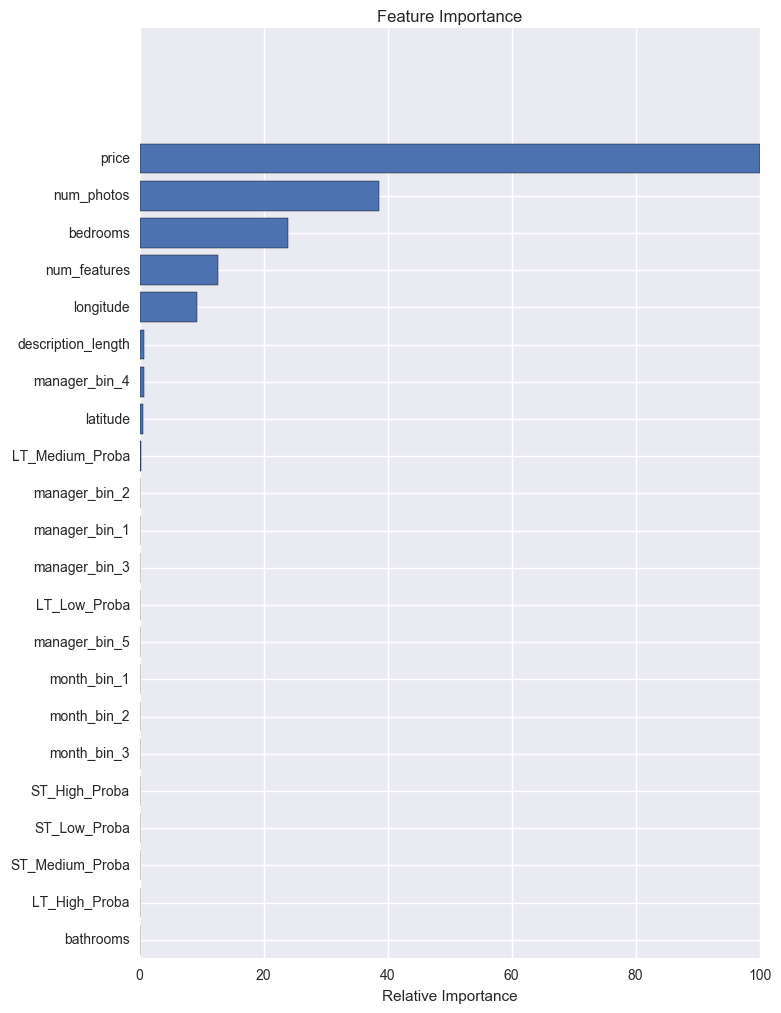

In [53]:
feature_importance = gs_clf2.best_estimator_.feature_importances_

feature_importance = 100.0 * (feature_importance / 
                              feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X.columns[sorted_idx]
plt.figure(figsize=(8,12))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')

**Interesting to see differences in feature selection between Logistic Regression and Decision Tree Classifier**

In [ ]:
# joblib.dump(gs_clf2, 'Pickled_Files/X_num_Sub_Models/X_num_gs_clf2.pickle')

## Model 3 - Gradient Boosting Classifier

In [54]:
clf3 = GradientBoostingClassifier(max_depth=1,
                                  learning_rate=0.01,
                                  random_state=82
                                 )

In [55]:
X_num_clf3_dictionary = evaluate_model(clf3)

In [56]:
model_summary(clf3, X_num_clf3_dictionary)

Model Summary Report:

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=82,
              subsample=1.0, verbose=0, warm_start=False)


Classification Report:

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       765
          1       0.69      1.00      0.82      6813
          2       0.00      0.00      0.00      2293

avg / total       0.48      0.69      0.56      9871

Accuracy on training set: 0.695803
Accuracy on test set:     0.690204


Log Loss on training set: 0.779264
Log Loss on test set:     0.785398


### Tuning Model 3 via GridSearch

In [57]:
params = {'max_depth': [1, 3],
          'learning_rate': [0.01, 0.10, 1.0]
         }

gs_clf3 = GridSearchCV(clf3,
                       params, 
                       n_jobs=-1,
                       cv=10,
                       verbose=1
                      )

In [58]:
X_num_gs_clf3_dictionary = evaluate_model(gs_clf3)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.1min finished


In [59]:
model_summary(gs_clf3, X_num_gs_clf3_dictionary)

Model Summary Report:

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=82,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)


Classification Report:

             precision    recall  f1-score   support

          0       0.44      0.19      0.27       765
          1       0.77      0.91      0.83      6813
          2       0.44      0.30      0.36      2293

avg / total       0.67      

In [60]:
X_num_models['gs_clf3'] = {'model': gs_clf3.best_estimator_,
                           'best_params': gs_clf3.best_params_,
                           'score': gs_clf3.best_score_
                          }

In [61]:
X_num_models['gs_clf3']

{'best_params': {'learning_rate': 1.0, 'max_depth': 3},
 'model': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=1.0, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_split=1e-07, min_samples_leaf=1,
               min_samples_split=2, min_weight_fraction_leaf=0.0,
               n_estimators=100, presort='auto', random_state=82,
               subsample=1.0, verbose=0, warm_start=False),
 'score': 0.72087839720371827}

In [62]:
# joblib.dump(gs_clf3, 'Pickled_Files/X_num_Sub_Models/X_num_gs_clf3.pickle')

## Model 3: Extracting Feature Importance

In [63]:
gs_clf3.best_estimator_.feature_importances_

array([ 0.01673377,  0.03815517,  0.14965944,  0.03604815,  0.06710413,
        0.0658447 ,  0.18435323,  0.15111559,  0.00612387,  0.01328568,
        0.0140731 ,  0.00926343,  0.00666034,  0.00599515,  0.0053275 ,
        0.00395147,  0.02584342,  0.01991927,  0.01944962,  0.06813245,
        0.0484794 ,  0.04448112])

In [64]:
model3_fi = pd.DataFrame({'Feature_Importance': gs_clf3.best_estimator_.feature_importances_,
                          'Feature': X_num_features['Feature'].values
                         })

model3_fi.sort_values(by='Feature_Importance', ascending=False)

,Feature,Feature_Importance
6,latitude,0.184353
7,longitude,0.151116
2,price,0.149659
19,LT_High_Proba,0.068132
4,num_features,0.067104
5,description_length,0.065845
20,LT_Low_Proba,0.048479
21,LT_Medium_Proba,0.044481
1,bedrooms,0.038155
3,num_photos,0.036048


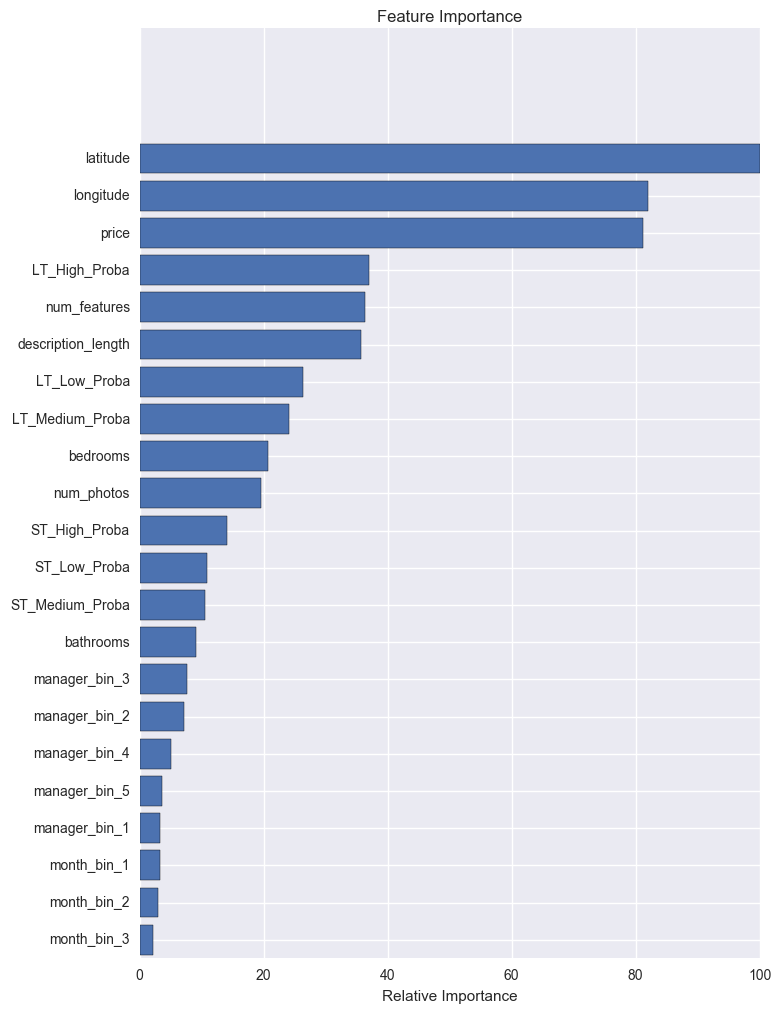

In [65]:
feature_importance = gs_clf3.best_estimator_.feature_importances_

feature_importance = 100.0 * (feature_importance / 
                              feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X.columns[sorted_idx]
plt.figure(figsize=(8,12))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')

## Majority Voting

In [66]:
clf_labels = ['Logistic Regression', 'Decision Tree Classifier', 'Gradient Boosting Classifier']

mv_clf = MajorityVoteClassifier(classifiers=[X_num_models['gs_clf1']['model'],
                                             X_num_models['gs_clf2']['model'],
                                             X_num_models['gs_clf3']['model']
                                             ])

clf_labels += ['Majority Voting']

all_clf = [X_num_models['gs_clf1']['model'],
            X_num_models['gs_clf2']['model'],
            X_num_models['gs_clf3']['model'],
            mv_clf
          ]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.6957 (+/- 0.0002) [Logistic Regression]
Accuracy: 0.7014 (+/- 0.0017) [Decision Tree Classifier]
Accuracy: 0.7209 (+/- 0.0048) [Gradient Boosting Classifier]
Accuracy: 0.7030 (+/- 0.0025) [Majority Voting]


In [67]:
clf_labels = ['Logistic Regression', 'Decision Tree Classifier', 'Gradient Boosting Classifier']

mv_clf = MajorityVoteClassifier(classifiers=[X_num_models['gs_clf1']['model'],
                                             X_num_models['gs_clf2']['model'],
                                             X_num_models['gs_clf3']['model']
                                             ])

clf_labels += ['Majority Voting']

all_clf = [X_num_models['gs_clf1']['model'],
            X_num_models['gs_clf2']['model'],
            X_num_models['gs_clf3']['model'],
            mv_clf
          ]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='neg_log_loss')
    
    print("Negative Log Loss: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Negative Log Loss: -0.7650 (+/- 0.0009) [Logistic Regression]
Negative Log Loss: -0.7008 (+/- 0.0109) [Decision Tree Classifier]
Negative Log Loss: -0.6470 (+/- 0.0104) [Gradient Boosting Classifier]
Negative Log Loss: -0.6600 (+/- 0.0043) [Majority Voting]


**MISC NOTES**

**Can call the model, `X_num_models['gs_clf1']['model']` - for use in majority voting below**

**How to Load in a Pickled Model**